In [ ]:
import pandas as pd 
import numpy as np 
#!pip install lifelines
# #!pip install pycox torchtuples
#!pip install seaborn
#!pip install pycox

  Using cached pycox-0.3.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached torchtuples-0.2.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached feather_format-0.4.1-py3-none-any.whl
  Using cached h5py-3.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached numba-0.61.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached py7zr-1.0.0-py3-none-any.whl.metadata (17 kB)
  Using cached pyarrow-20.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
  Using cached llvmlite-0.44.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
  Using cached pycryptodomex-3.23.0-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manyl

In [4]:
df_train = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/train.csv")
df_val = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/val.csv")
df_test = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/test.csv")
df = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/df_merged_allslides.csv")


df_train_clean =pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/train_clean.csv")
df_val_clean = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/val_clean.csv")
df_test_clean = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/test_clean.csv")
df_clean = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/df_clean.csv")



In [5]:
print(df_train_clean.info())
print(df_test_clean.info())

df_val_clean.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   slide_path              287 non-null    object 
 1   slide_id                287 non-null    object 
 2   patient_id              287 non-null    object 
 3   vital_status            287 non-null    object 
 4   os_days                 287 non-null    float64
 5   event                   287 non-null    int64  
 6   age_at_diagnosis_years  287 non-null    float64
 7   tumour_stage            287 non-null    int64  
 8   tumour_grade            287 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 20.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   slide_path              62 non-n

slide_path                0
slide_id                  0
patient_id                0
vital_status              0
os_days                   0
event                     0
age_at_diagnosis_years    0
tumour_stage              0
tumour_grade              0
dtype: int64

<Axes: title={'center': 'Vital Status Distribution'}, xlabel='vital_status'>

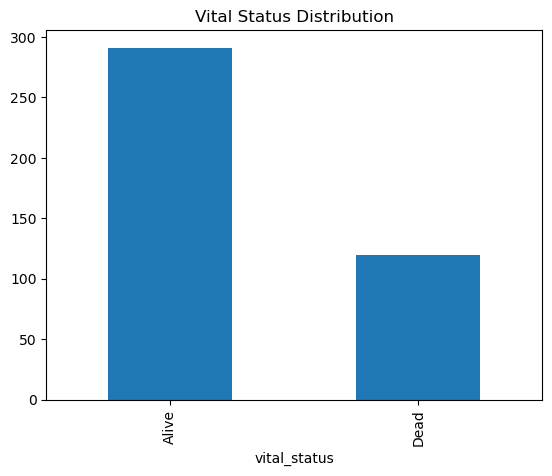

In [6]:
df_clean['vital_status'].value_counts().plot(kind='bar', title="Vital Status Distribution")

In [ ]:
def vital_status_percentage(df_clean, name=""):
    print(f"\n{name} distribution (%):")
    print((df['vital_status'].value_counts(normalize=True) * 100).round(2))


vital_status_percentage(df_train_clean, name="Train")
vital_status_percentage(df_val_clean, name="Validation")
vital_status_percentage(df_test_clean, name="Test")


Train distribution (%):
vital_status
Alive    67.05
Dead     32.95
Name: proportion, dtype: float64

Validation distribution (%):
vital_status
Alive    67.05
Dead     32.95
Name: proportion, dtype: float64

Test distribution (%):
vital_status
Alive    67.05
Dead     32.95
Name: proportion, dtype: float64


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              411 non-null    int64  
 1   slide_path              411 non-null    object 
 2   slide_id                411 non-null    object 
 3   patient_id              411 non-null    object 
 4   vital_status            411 non-null    object 
 5   os_days                 411 non-null    float64
 6   event                   411 non-null    int64  
 7   age_at_diagnosis_years  411 non-null    float64
 8   tumour_stage            411 non-null    int64  
 9   tumour_grade            411 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 32.2+ KB


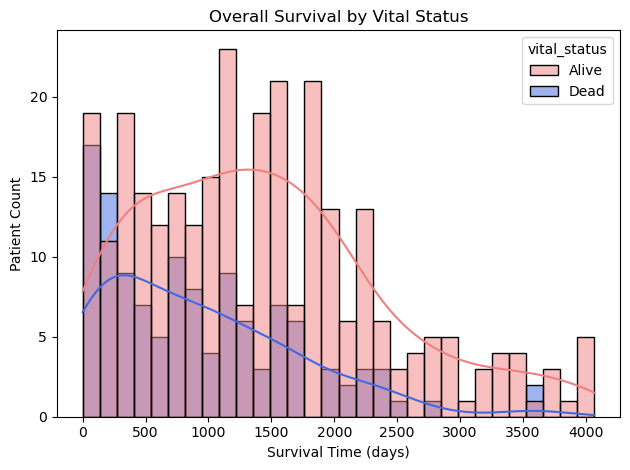

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_clean, x="os_days", hue="vital_status", kde=True, bins=30, palette=["#f08080", "#4169e1"])
plt.title("Overall Survival by Vital Status")
plt.xlabel("Survival Time (days)")
plt.ylabel("Patient Count")
plt.tight_layout()
plt.show()

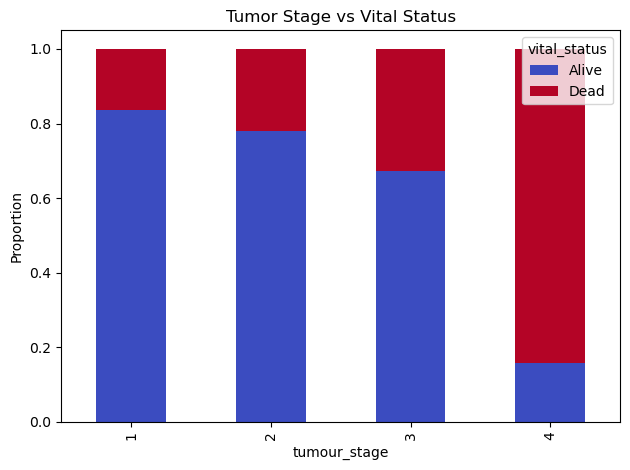

In [17]:
pd.crosstab(df_clean['tumour_stage'], df_clean['vital_status'], normalize='index').plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Tumor Stage vs Vital Status")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

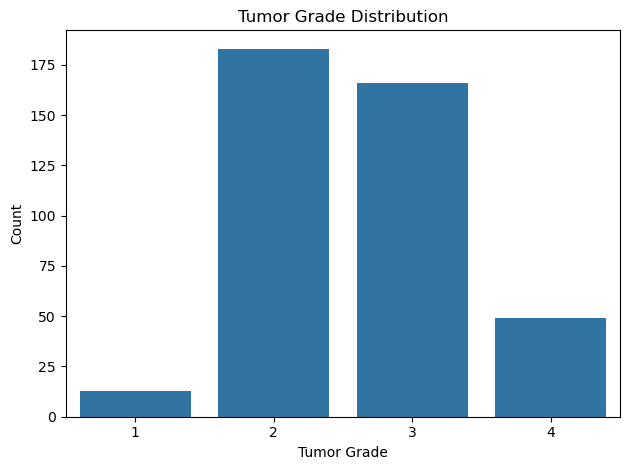

In [19]:
sns.countplot(data=df_clean, x="tumour_grade", order=sorted(df_clean['tumour_grade'].dropna().unique()))
plt.title("Tumor Grade Distribution")
plt.xlabel("Tumor Grade")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/rds/general/ephemeral/user/dla24/ephemeral/ipykernel_69743/4233320702.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="vital_status", y="age_at_diagnosis_years", palette="Set2")


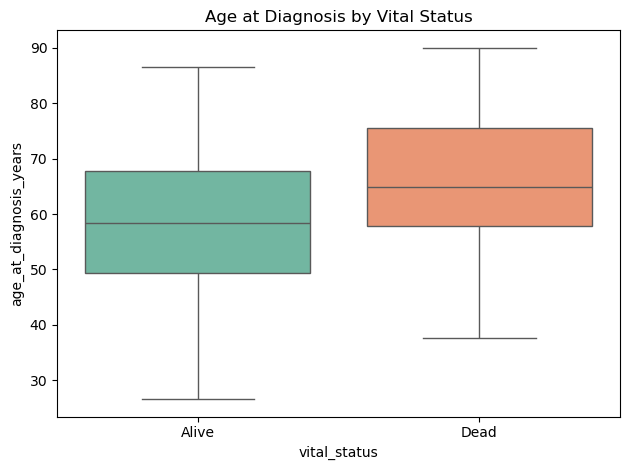

In [21]:
sns.boxplot(data=df_clean, x="vital_status", y="age_at_diagnosis_years", palette="Set2")
plt.title("Age at Diagnosis by Vital Status")
plt.tight_layout()
plt.show()

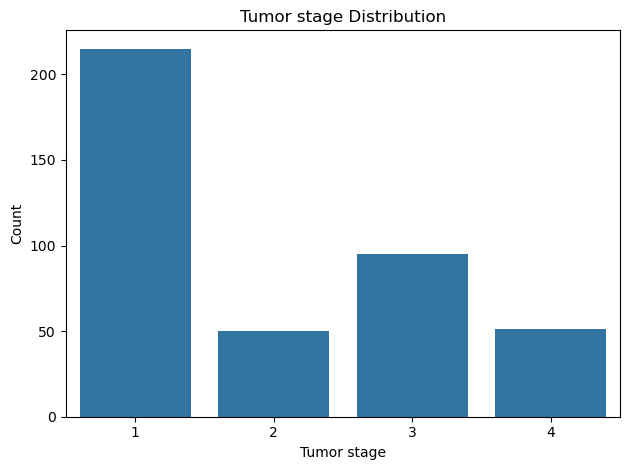

In [22]:
sns.countplot(data=df_clean, x="tumour_stage", order=sorted(df_clean['tumour_stage'].dropna().unique()))
plt.title("Tumor stage Distribution")
plt.xlabel("Tumor stage")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

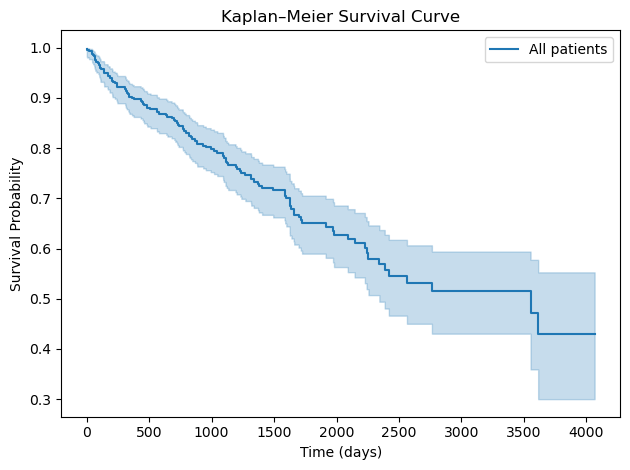

In [23]:

# Fit KM curve
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
kmf.fit(durations=df_clean["os_days"], event_observed=df_clean["event"], label="All patients")

kmf.plot(ci_show=True)
plt.title("Kaplan–Meier Survival Curve")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.tight_layout()
plt.show()

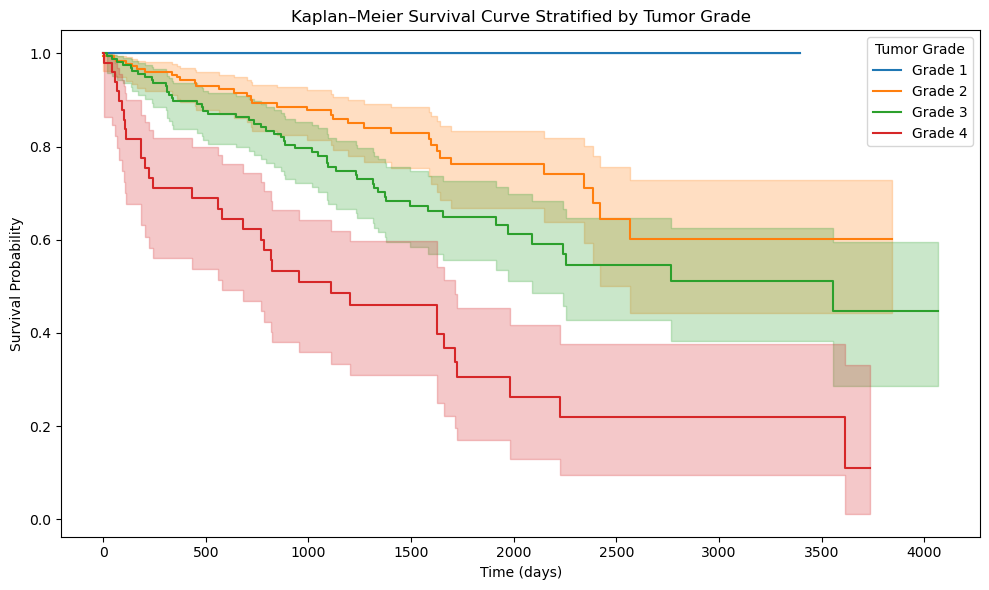

In [26]:

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

# Loop through unique tumor grades
for grade in sorted(df_clean["tumour_grade"].dropna().unique()):
    subset = df_clean[df_clean["tumour_grade"] == grade]
    kmf.fit(durations=subset["os_days"], event_observed=subset["event"], label=f"Grade {int(grade)}")
    kmf.plot(ci_show=True)

plt.title("Kaplan–Meier Survival Curve Stratified by Tumor Grade")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.legend(title="Tumor Grade")
plt.tight_layout()
plt.show()

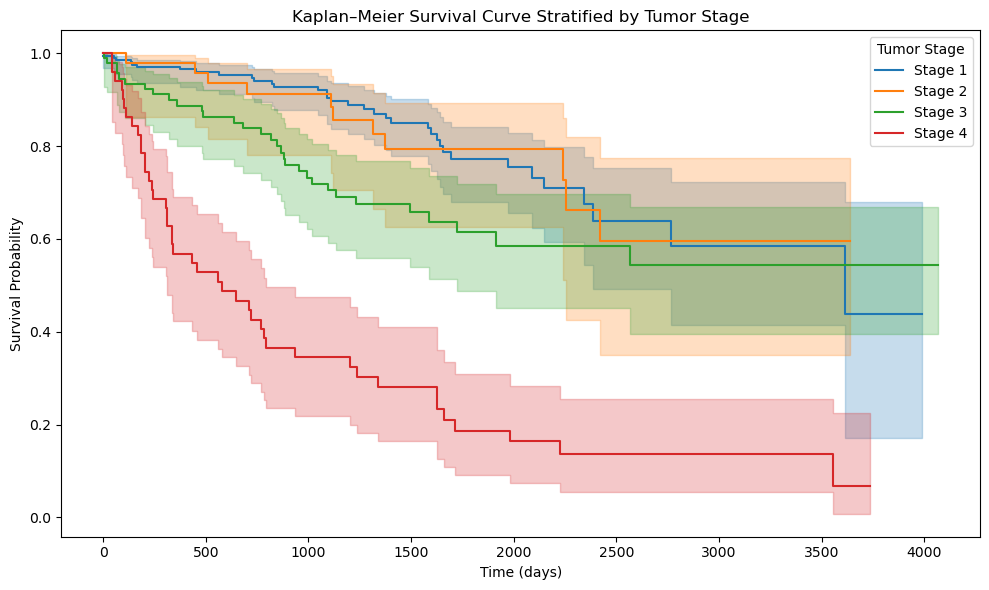

In [27]:

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

# Loop through unique tumor grades
for stage in sorted(df_clean["tumour_stage"].dropna().unique()):
    subset = df_clean[df_clean["tumour_stage"] == stage]
    kmf.fit(durations=subset["os_days"], event_observed=subset["event"], label=f"Stage {int(stage)}")
    kmf.plot(ci_show=True)

plt.title("Kaplan–Meier Survival Curve Stratified by Tumor Stage")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.legend(title="Tumor Stage")
plt.tight_layout()
plt.show()

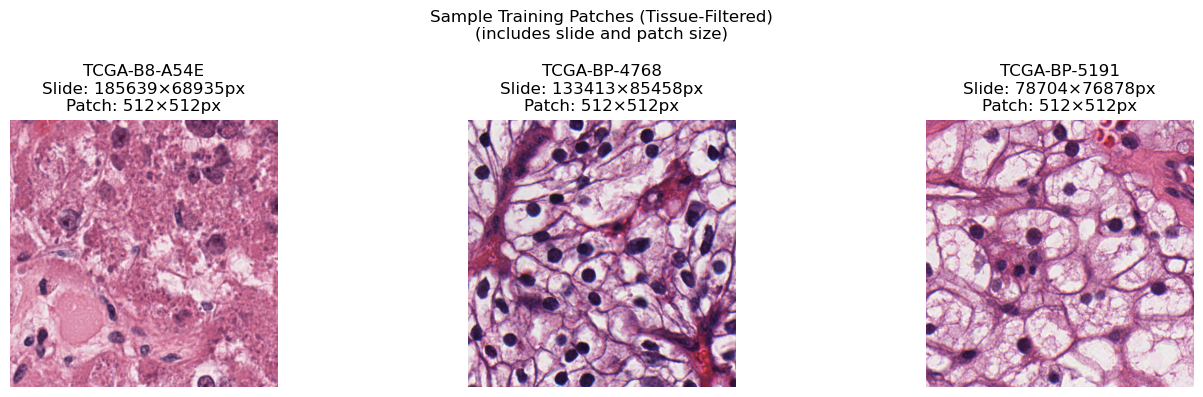

Slide: /rds/general/user/dla24/home/thesis/TGCA_dataset/all_slides/TCGA-BP-5191-01Z-00-DX1.4942ebf2-cef3-4cff-8430-b377d274952f.svs — mpp_x=0.2498, mpp_y=0.2498


In [ ]:
import openslide
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd


df = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/train.csv")

# Sample 3 random slide paths
sample_paths = df["slide_path"].sample(3, random_state=42).tolist()

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

for i, slide_path in enumerate(sample_paths):
    slide = openslide.OpenSlide(slide_path)
    w, h = slide.dimensions

    # Try up to 10 random patches until one passes tissue filter
    for _ in range(10):
        x = random.randint(0, w - 512)
        y = random.randint(0, h - 512)
        patch = slide.read_region((x, y), 0, (512, 512)).convert("RGB")

        # Basic grayscale tissue filter
        if np.array(patch.convert("L")).mean() < 230:
            break

    axs[i].imshow(patch)
    axs[i].axis("off")
    axs[i].set_title(
        f"{slide_path.split('/')[-1][:12]}\n"
        f"Slide: {w}×{h}px\n"
        f"Patch: {patch.size[0]}×{patch.size[1]}px"
    )

plt.suptitle("Sample Training Patches (Tissue-Filtered)\n(includes slide and patch size)")
plt.tight_layout()
plt.show()

slide = openslide.OpenSlide(slide_path)
mpp_x = float(slide.properties.get("openslide.mpp-x", 0.5))
mpp_y = float(slide.properties.get("openslide.mpp-y", 0.5))
print(f"Slide: {slide_path} — mpp_x={mpp_x}, mpp_y={mpp_y}")

<Axes: xlabel='age_at_diagnosis_years', ylabel='Density'>

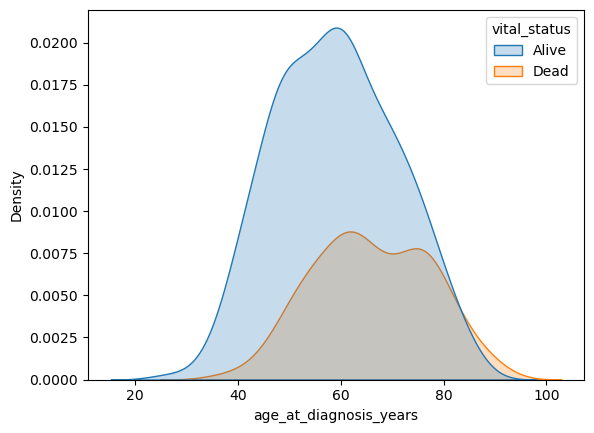

In [29]:
sns.kdeplot(data=df_clean, x="age_at_diagnosis_years", hue="vital_status", fill=True)

<Axes: xlabel='tumour_grade', ylabel='count'>

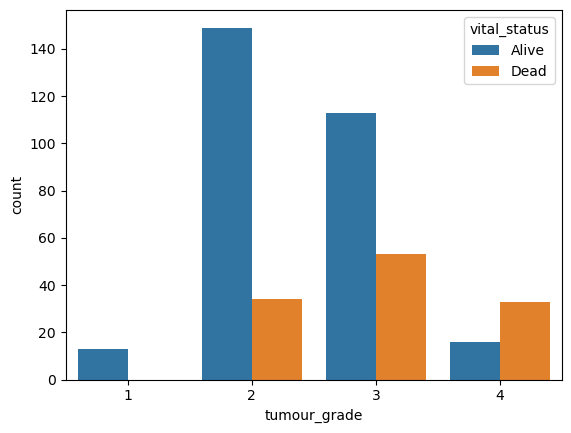

In [31]:
sns.countplot(data=df_clean, x="tumour_grade", hue="vital_status")

<Axes: xlabel='tumour_stage', ylabel='os_days'>

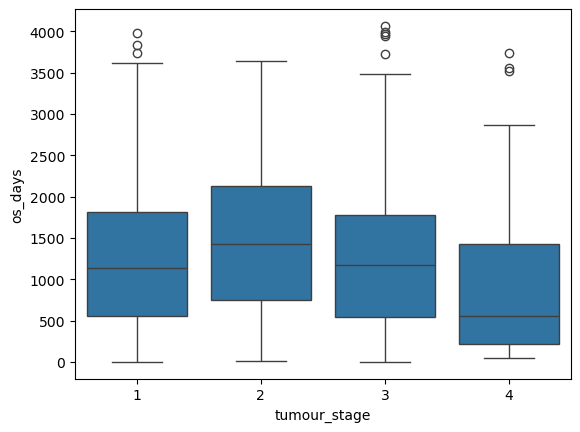

In [32]:
sns.boxplot(data=df_clean, x="tumour_stage", y="os_days")

<Axes: >

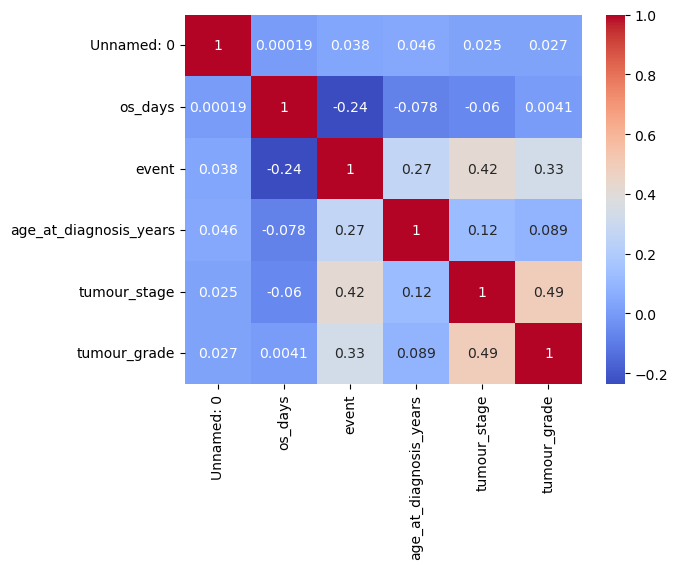

In [33]:
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [35]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df_clean[["os_days", "event", "tumour_grade", "tumour_stage"]], duration_col="os_days", event_col="event")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 411 total observations, 291 right-censored observations>
             duration col = 'os_days'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 411
number of events observed = 120
   partial log-likelihood = -610.38
         time fit was run = 2025-07-02 10:49:32 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
tumour_grade  0.35      1.42      0.14            0.07            0.63                1.07                1.88
tumour_stage  0.51      1.67      0.09            0.33            0.70                1.39                2.01

              cmp to    z      p  -log2(p)
covariate                                 
tumour_grade    0.00 2.44   0.01      6.08
tumour_stage    0.00 5.42 <0.005     24.00
---
Concordance = 0.72
Partial AIC = 1224.77
log-likelihood ratio test = 65.04 on 2 df
-log2(p) of ll-ratio test = 46.92

In [36]:
df_clean["grade_group"] = df_clean["tumour_grade"].apply(lambda g: "Low" if g in [1,2] else "High")

In [ ]:
import openslide
import os
import pandas as pd

df = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/train.csv") 
for slide_path in df["slide_path"]:
    try:
        slide = openslide.OpenSlide(slide_path)
        mpp_x = float(slide.properties.get("openslide.mpp-x", 0))
        mpp_y = float(slide.properties.get("openslide.mpp-y", 0))
        print(f"{os.path.basename(slide_path)}\tmpp_x={mpp_x:.4f}\tmpp_y={mpp_y:.4f}")
    except Exception as e:
        print(f"{os.path.basename(slide_path)}\t[FAILED]: {e}")

TCGA-BP-5168-01Z-00-DX1.7300af72-5dae-4b4c-bb73-62be8720006e.svs	mpp_x=0.2498	mpp_y=0.2498
TCGA-B0-4696-01Z-00-DX1.87ac4060-189a-4187-a7ed-9bc5fcfa6feb.svs	mpp_x=0.2520	mpp_y=0.2520
TCGA-B0-5710-01Z-00-DX1.1d30af81-4ce1-4574-9bca-c8f3e1f7f209.svs	mpp_x=0.2520	mpp_y=0.2520
TCGA-BP-5183-01Z-00-DX1.f84b4982-b51e-4220-a80b-767ecbb3e20f.svs	mpp_x=0.2498	mpp_y=0.2498
TCGA-DV-5568-01Z-00-DX1.a93bd551-4146-493a-afeb-653ba63a95c1.svs	mpp_x=0.2520	mpp_y=0.2520
TCGA-DV-A4VX-01Z-00-DX1.9E7036DB-6DD7-4D25-93BD-298206C85EDA.svs	mpp_x=0.2465	mpp_y=0.2465
TCGA-B0-4843-01Z-00-DX1.22597d5c-43e9-4ed1-a2c2-68d2f70fd5c4.svs	mpp_x=0.2520	mpp_y=0.2520
TCGA-B8-4146-01Z-00-DX1.0F0EECE2-3ECC-4CEB-AAAC-DCE2AAF8E7CA.svs	mpp_x=0.2520	mpp_y=0.2520
TCGA-BP-4987-01Z-00-DX1.6c63360c-7ac1-41f3-916f-214a4017e455.svs	mpp_x=0.2498	mpp_y=0.2498
TCGA-A3-3365-01Z-00-DX1.dc5b8d77-b5ba-47c8-b536-a8f1ed458ed3.svs	mpp_x=0.2520	mpp_y=0.2520
TCGA-BP-5169-01Z-00-DX1.b9739d1e-6d86-44ab-a064-9fe50d393613.svs	mpp_x=0.2498	mpp_y=0.2498

KeyboardInterrupt: 

In [14]:
import openslide
import pandas as pd

df = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/df_clean.csv")

mpp_list = []
for slide_path in df["slide_path"]:
    try:
        slide = openslide.OpenSlide(slide_path)
        mpp_x = float(slide.properties.get("openslide.mpp-x", 0.5))
        mpp_list.append(mpp_x)
    except Exception as e:
        print(f"{slide_path}: ERROR {e}")
        mpp_list.append(None)

df["mpp_x"] = mpp_list

# Use a tolerance to bin slides (~0.25, ~0.5, others)
import numpy as np

def classify_mpp(mpp):
    if mpp is None:
        return "unknown"
    elif np.isclose(mpp, 0.25, atol=0.01):
        return "0.25"
    elif np.isclose(mpp, 0.5, atol=0.01):
        return "0.5"
    else:
        return f"{mpp:.3f}"

df["mpp_class"] = df["mpp_x"].apply(classify_mpp)

print(df["mpp_class"].value_counts())

mpp_class
0.25     393
0.5       15
0.233      3
Name: count, dtype: int64
